In [1]:
import nbsetup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from models.milky import MilkyWay

In [ ]:
milk = MilkyWay(points=101, radius=100, cp=nbsetup.cp)
milk.analyse_radius()
milk.rotate('x','z')
milk.lines()

0.6509748122150711 percent analysed


In [12]:
def fields(self, stack=None, row=None, dimension=0, ylim=(None, None), xlim=(None, None)):
    """ Plots graph for a given dimension """
    
    if stack is None: stack = self.space.center[0]
    if row is None: row = self.space.center[1]
    
    fig, axes = plt.subplots(2,1,figsize=(15,15),sharex=True)
    
    # calcs
    x = self.space.x
    gx = self.sums[dimension][stack][row]
    ga = self.sums['abs'][stack][row]
    mass = self.sums['mass'][stack][row]
    
    attempts = {
        'gx/ga': gx/ga,
        'gx/ga0.5': gx/(ga**0.5)
    }
    
    # left
    ax1 = axes[1]
    ax2 = ax1.twinx()
    g = sns.lineplot(x=x, y=gx, ax=ax1, label='Dimensional gravity')
    sns.lineplot(x=x, y=ga, ax=ax1, label='Absolute gravity')
    sns.lineplot(x=x, y=mass, ax=ax2, label='Mass', color='grey')
    g.set(ylim=ylim, xlim=xlim, title='Gravity')
    
    # right
    ax3 = axes[0]
    ax4 = ax3.twinx()
    h = sns.lineplot(x=x, y=np.abs(gx)**0.5, ax=ax3, label='Standard velocity')
    h.set(title='Velocities',xlim=xlim, ylim=ylim)
    
    for key, value in attempts.items():
        sns.lineplot(x=x, y=value**0.5, ax=ax4, label=key)
        

In [44]:
def trial(self, stack=None, row=None, dimension=0, ylim=(None, None), xlim=(None, None)):
    """ Plots graph for a given dimension """
    
    if stack is None: stack = self.space.center[0]
    if row is None: row = self.space.center[1]
    if ylim is True: ylim = (0, None)
    if xlim is True: xlim = (self.space.center[2]*self.space.scale, None)
    
    # calcs
    x = self.space.x
    gx = self.sums[dimension][stack][row]
    ga = self.sums['abs'][stack][row]
    mass = self.sums['mass'][stack][row]
    
    attempts = {
        'gx/ga': gx/ga,
        'gx/ga0.85': gx/(ga**0.85),
        'gx/ga0.9': gx/(ga**0.9)
    }
    
    
    fig, axes = plt.subplots(1,len(attempts),figsize=(15,5))
    for i, key in enumerate(attempts.keys()):
        g = sns.lineplot(x=x, y=np.abs(attempts[key])**0.5, ax=axes[i], color='orange')
        g.set(title=key, xlim=xlim, ylim=ylim)
        sns.lineplot(x=x, y=np.abs(gx)**0.5, ax=axes[i].twinx())
    
    

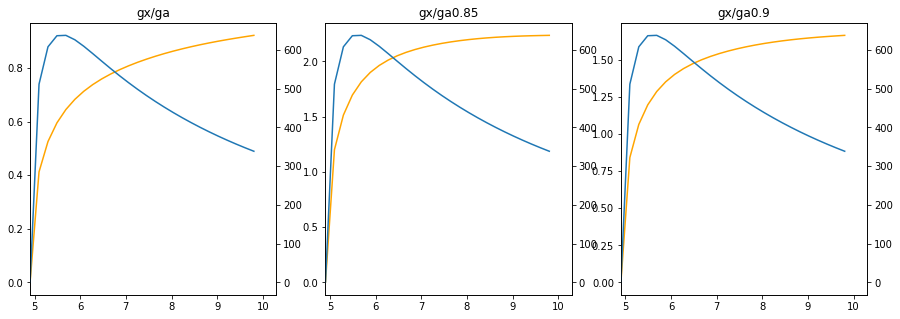

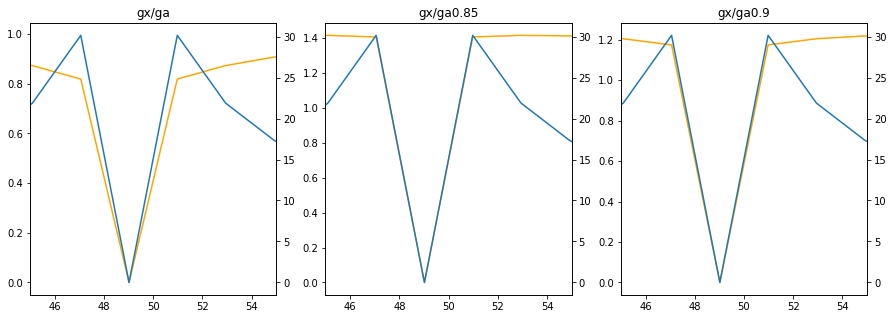

In [46]:
trial(close, xlim=True)
trial(far, xlim=(45,55))

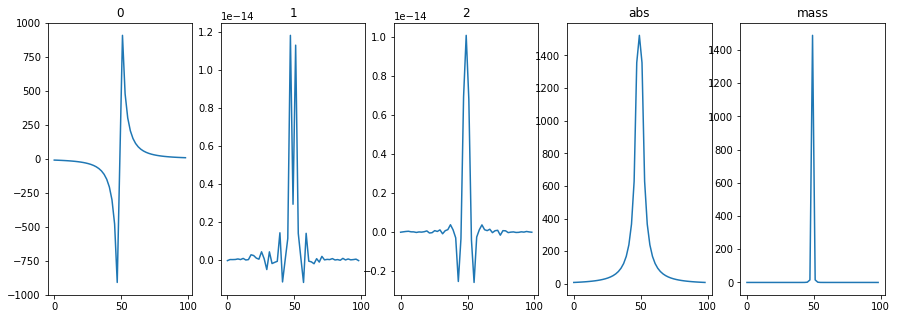

In [8]:
far = MilkyWay(51, 50, cp=nbsetup.cp)
far.analyse_radius()
far.rotate('x','z')
far.lines()

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_2182/857198321.py:29: RuntimeWarning: invalid value encountered in sqrt
  sns.lineplot(x=x, y=adj**0.5, ax=ax4, label='Adjusted velocity')


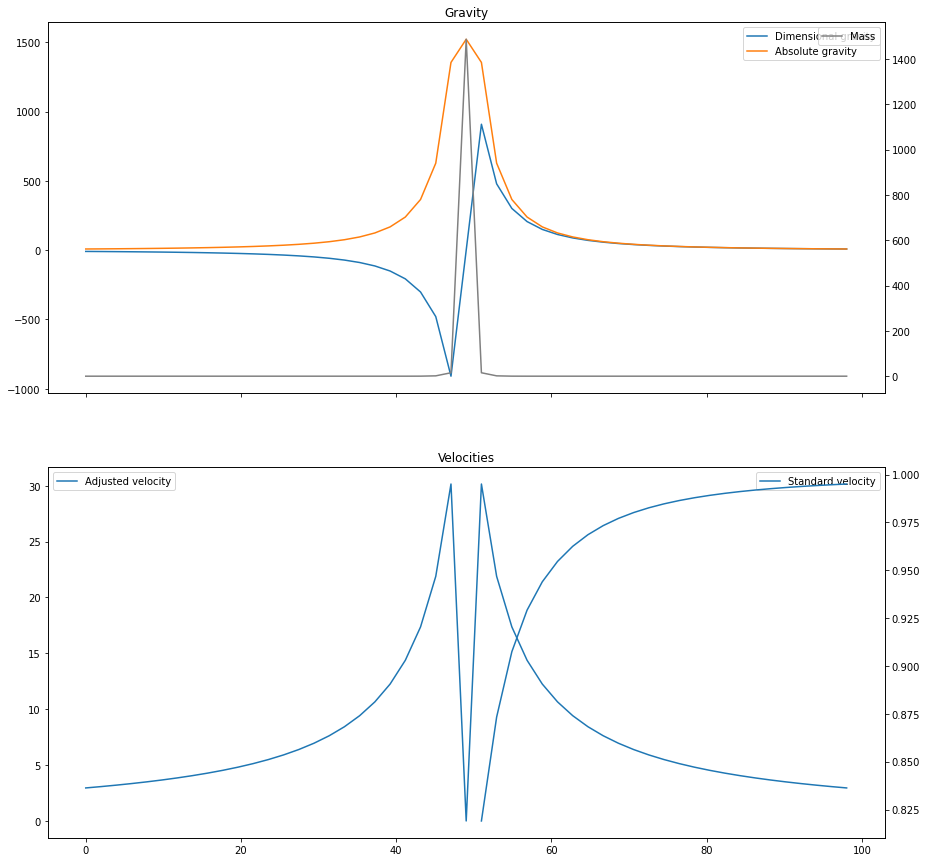

In [9]:
fields(far)